#Read Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/KittipasM/dataset/main/netflix_titles.csv')

In [3]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

#Top 10 Genres in Netflix

##Preprocessing

###Create Genres Table

In [6]:
dfGenre = df[['show_id','listed_in']]
dfGenre

,show_id,listed_in
0,s1,Documentaries
1,s2,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,"Docuseries, Reality TV"
4,s5,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...
8802,s8803,"Cult Movies, Dramas, Thrillers"
8803,s8804,"Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,"Comedies, Horror Movies"
8805,s8806,"Children & Family Movies, Comedies"


###Convert Genre to List

In [7]:
dfGenre['genre'] = dfGenre['listed_in'].str.split(', ')
dfGenre

<ipython-input-7-fb744b8c14be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfGenre['genre'] = dfGenre['listed_in'].str.split(', ')


,show_id,listed_in,genre
0,s1,Documentaries,[Documentaries]
1,s2,"International TV Shows, TV Dramas, TV Mysteries","[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,"Crime TV Shows, International TV Shows, TV Act...","[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,"Docuseries, Reality TV","[Docuseries, Reality TV]"
4,s5,"International TV Shows, Romantic TV Shows, TV ...","[International TV Shows, Romantic TV Shows, TV..."
...,...,...,...
8802,s8803,"Cult Movies, Dramas, Thrillers","[Cult Movies, Dramas, Thrillers]"
8803,s8804,"Kids' TV, Korean TV Shows, TV Comedies","[Kids' TV, Korean TV Shows, TV Comedies]"
8804,s8805,"Comedies, Horror Movies","[Comedies, Horror Movies]"
8805,s8806,"Children & Family Movies, Comedies","[Children & Family Movies, Comedies]"


###Explode Genre List

In [8]:
dfGenre = dfGenre.explode('genre')
dfGenre

,show_id,listed_in,genre
0,s1,Documentaries,Documentaries
1,s2,"International TV Shows, TV Dramas, TV Mysteries",International TV Shows
1,s2,"International TV Shows, TV Dramas, TV Mysteries",TV Dramas
1,s2,"International TV Shows, TV Dramas, TV Mysteries",TV Mysteries
2,s3,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows
...,...,...,...
8805,s8806,"Children & Family Movies, Comedies",Children & Family Movies
8805,s8806,"Children & Family Movies, Comedies",Comedies
8806,s8807,"Dramas, International Movies, Music & Musicals",Dramas
8806,s8807,"Dramas, International Movies, Music & Musicals",International Movies


## Result

In [9]:
dfGenre['genre'].value_counts()

International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
C

In [10]:
dfGenre.groupby('genre').size().reset_index(name='size')\
        .sort_values(by='size', ascending=False).head(10)

,genre,size
16,International Movies,2752
12,Dramas,2427
7,Comedies,1674
17,International TV Shows,1351
10,Documentaries,869
0,Action & Adventure,859
34,TV Dramas,763
15,Independent Movies,756
4,Children & Family Movies,641
24,Romantic Movies,616


In [11]:
dfPlotg = dfGenre.groupby('genre').size().reset_index(name='size')\
        .sort_values(by='size', ascending=False).head(10)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

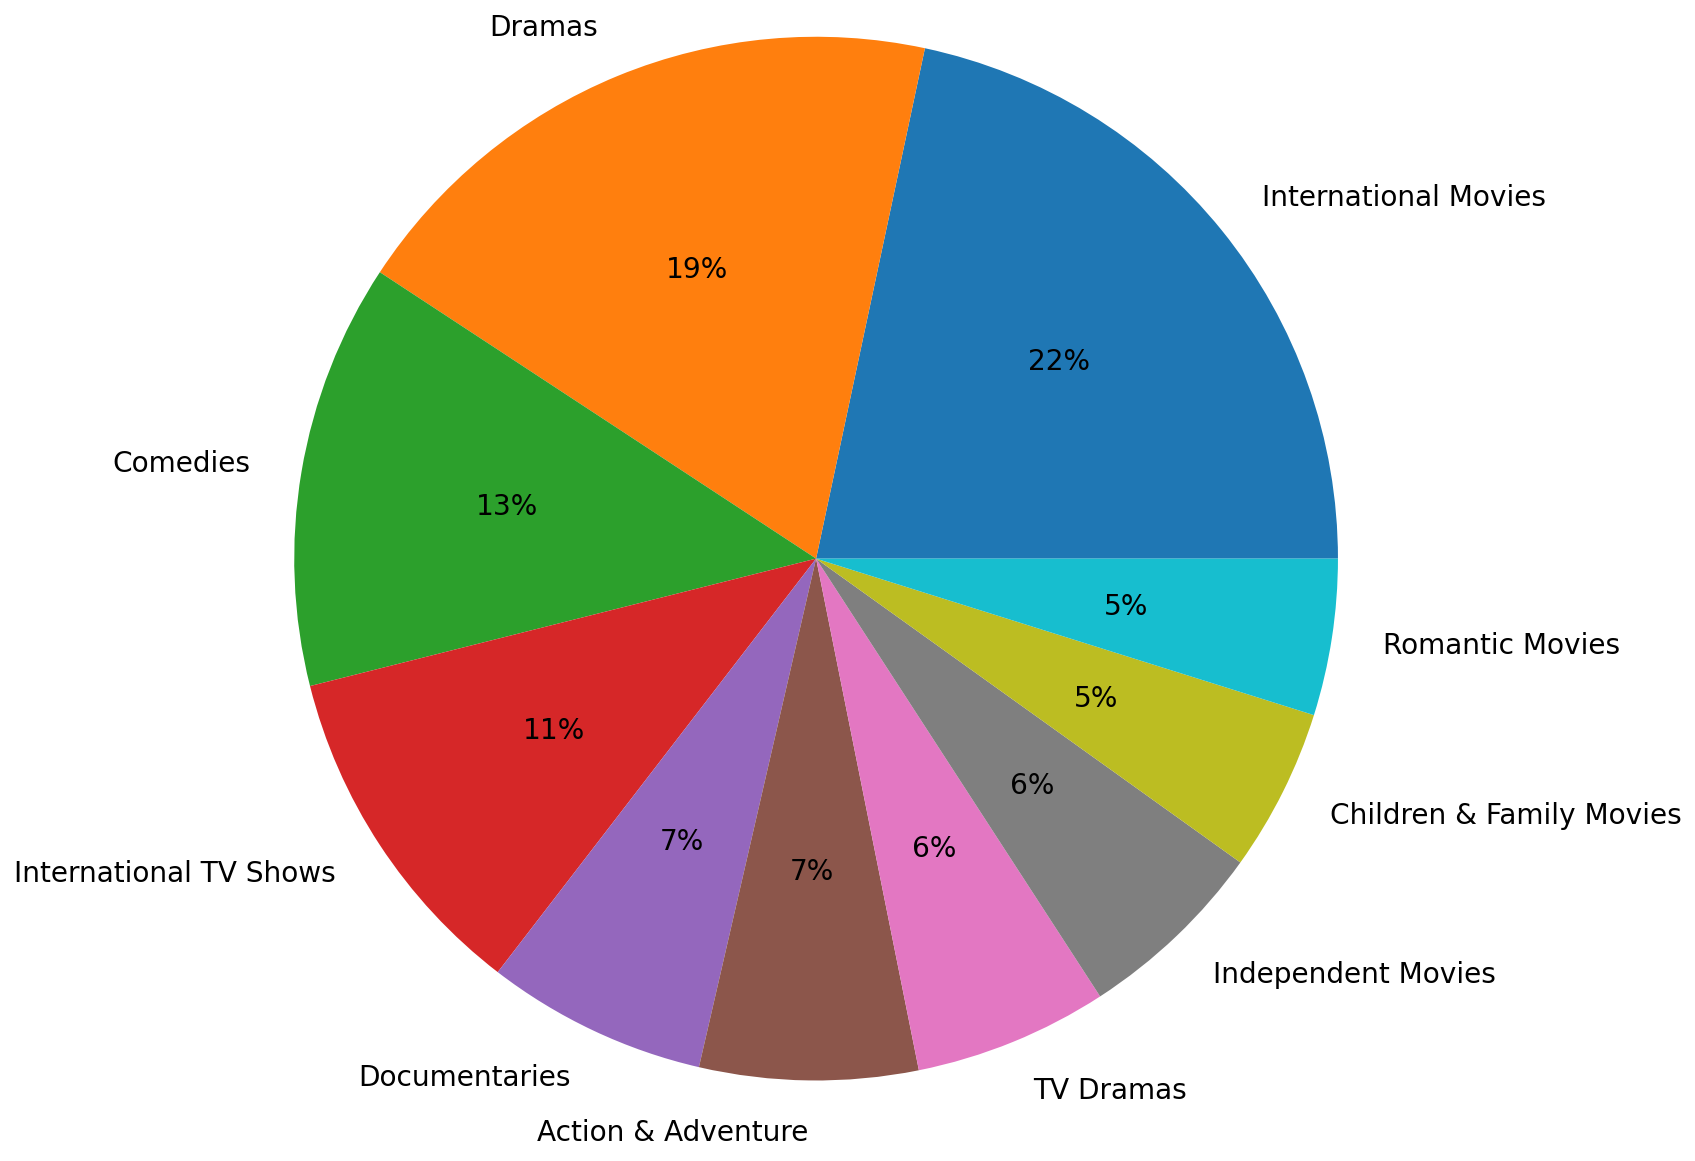

In [13]:
plt.pie(dfPlotg['size'], labels=dfPlotg['genre'],
        autopct='%.0f%%', radius=3, textprops={'fontsize': 14});

# Number of Released Shows from 2000-2021

In [14]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [15]:
df['release_year'].isnull().sum()

0

In [16]:
pd.set_option("display.max_rows", None)
df['release_year'].value_counts(ascending=False)

2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
2010     194
2011     185
2009     152
2008     136
2006      96
2007      88
2005      80
2004      64
2003      61
2002      51
2001      45
1999      39
1997      38
2000      37
1998      36
1993      28
1995      25
1996      24
1992      23
1994      22
1990      22
1988      18
1982      17
1991      17
1989      16
1981      13
1986      13
1984      12
1980      11
1979      11
1983      11
1985      10
1973      10
1976       9
1987       8
1977       7
1974       7
1975       7
1978       7
1972       5
1967       5
1971       5
1960       4
1945       4
1944       3
1955       3
1968       3
1962       3
1943       3
1958       3
1964       2
1969       2
1970       2
1963       2
1956       2
1965       2
1946       2
1942       2
1954       2
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, dtype: int64

In [17]:
pd.set_option("display.max_rows", 10)

##Preprocessing

In [18]:
dfYear = df[df['release_year'] >= 2000]
dfYear

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


##Result

In [19]:
dfPloty = dfYear.groupby('release_year').size().reset_index(name='size')
dfPloty

,release_year,size
0,2000,37
1,2001,45
2,2002,51
3,2003,61
4,2004,64
...,...,...
17,2017,1032
18,2018,1147
19,2019,1030
20,2020,953


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Select Colors :
https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette

In [21]:
import seaborn as sb
colors = sb.color_palette('pastel')[0:len(dfPloty)]

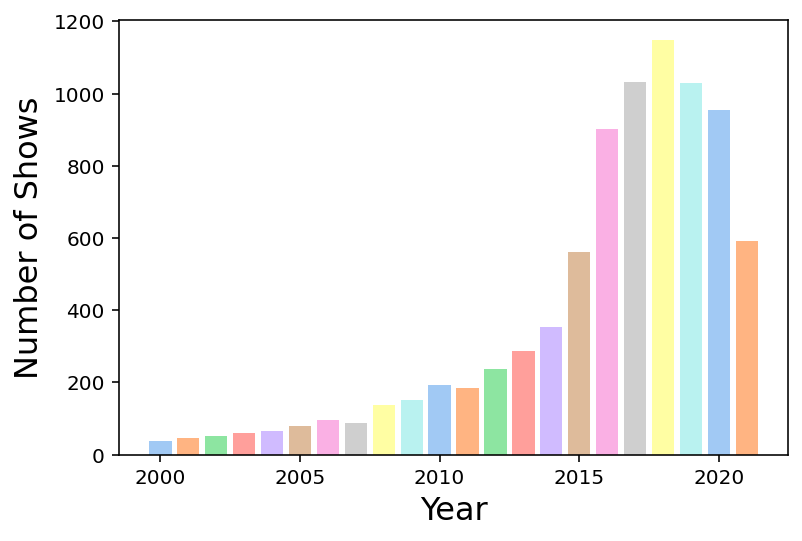

In [22]:
plt.bar(dfPloty['release_year'], dfPloty['size'], color=colors, width=0.8)
plt.xlabel('Year',  fontsize=16)
plt.ylabel('Number of Shows',  fontsize=16);